# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING IN DATA

In [2]:
PharmacySales_Dataframe = pd.read_csv('pharmacy_sales_april_2023.csv')

# BRIEF ANALYSIS OF THE DATAFRAME

In [3]:
# Head of the dataframe
PharmacySales_Dataframe.head()

,SaleID,Time,DrugID,DrugName,DrugClass,Price,ExpDate,Quantity
0,12005226,4/1/2023 9:04,D0051,Ciprofloxacin,Psychotropic,106,2024-03,6
1,12005226,4/1/2023 9:04,D0051,Olmesartan,Analgesic,170,2023-10,2
2,12005227,4/1/2023 9:05,D0049,Donepezil,Antiviral,184,2024-03,5
3,12005227,4/1/2023 9:05,D0061,Fexofenadine,Hormonal,54,2023-05,6
4,12005227,4/1/2023 9:05,D0034,Naproxen,Respiratory,50,2024-01,3


In [4]:
# Tail of the dataframe
PharmacySales_Dataframe.tail()

,SaleID,Time,DrugID,DrugName,DrugClass,Price,ExpDate,Quantity
19998,12011939,4/13/2023 14:09,D0093,Docusate,Neurological,70,2024-03,5
19999,12011939,4/13/2023 14:09,D0061,Fexofenadine,Hormonal,54,2023-11,7
20000,12011939,4/13/2023 14:09,D0085,Rivastigmine,Hormonal,72,2024-04,9
20001,12011939,4/13/2023 14:09,D0010,Tramadol,Oncology,43,2024-01,10
20002,12011939,4/13/2023 14:09,D0013,Travoprost,Dermatological,198,2024-02,3


In [5]:
# Information about the dataframe
PharmacySales_Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20003 entries, 0 to 20002
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SaleID     20003 non-null  int64 
 1   Time       20003 non-null  object
 2   DrugID     20003 non-null  object
 3   DrugName   20003 non-null  object
 4   DrugClass  20003 non-null  object
 5   Price      20003 non-null  int64 
 6   ExpDate    20003 non-null  object
 7   Quantity   20003 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [6]:
# Statistical summary of the dataframe
PharmacySales_Dataframe.describe()

,SaleID,Price,Quantity
count,2.000300e+04,20003.000000,20003.000000
mean,1.200861e+07,113.573064,5.478878
std,1.938323e+03,53.123087,2.858352
min,1.200523e+07,27.000000,1.000000
25%,1.200694e+07,66.000000,3.000000
50%,1.200861e+07,116.000000,5.000000
75%,1.201030e+07,164.000000,8.000000
max,1.201194e+07,200.000000,10.000000


# STRUCTURAL MANIPULATION OF THE DATAFRAME

In [7]:
# Here we going to:
# Rename Columns that is required for forecasting predictions

In [8]:
# Renaming 'Time' column to 'ds' 
PharmacySales_Dataframe.rename({'Time':'ds'},axis=1,inplace=True)

In [9]:
# Renaming 'Price' column to 'y'
PharmacySales_Dataframe.rename({'Price':'y'},axis=1,inplace=True)

In [10]:
# Displaying columnns to see amendment
PharmacySales_Dataframe.columns

Index(['SaleID', 'ds', 'DrugID', 'DrugName', 'DrugClass', 'y', 'ExpDate',
       'Quantity'],
      dtype='object')

# DATA TRANSFORMATION

In [11]:
# Here we going to:
# Check datatypes
# Covert datatypes to suit the time series forecasting predictions

In [12]:
# Checking datatypes
PharmacySales_Dataframe.dtypes

SaleID        int64
ds           object
DrugID       object
DrugName     object
DrugClass    object
y             int64
ExpDate      object
Quantity      int64
dtype: object

In [13]:
# Conveerting 'ds' which is a datetime to 'datetime' datatype
PharmacySales_Dataframe['ds'] = pd.to_datetime(PharmacySales_Dataframe['ds'], format='%m/%d/%Y %H:%M')

In [14]:
# Displaying datatypes again 
PharmacySales_Dataframe.dtypes

SaleID                int64
ds           datetime64[ns]
DrugID               object
DrugName             object
DrugClass            object
y                     int64
ExpDate              object
Quantity              int64
dtype: object

# EXPLORATORY DATA ANALYSIS(EDA)

# TASK(S)

In [15]:
#Identify popular products: This dataset can be used to identify the most popular products sold by the pharmacy. 
#This information can be used to improve product selection and marketing strategies.

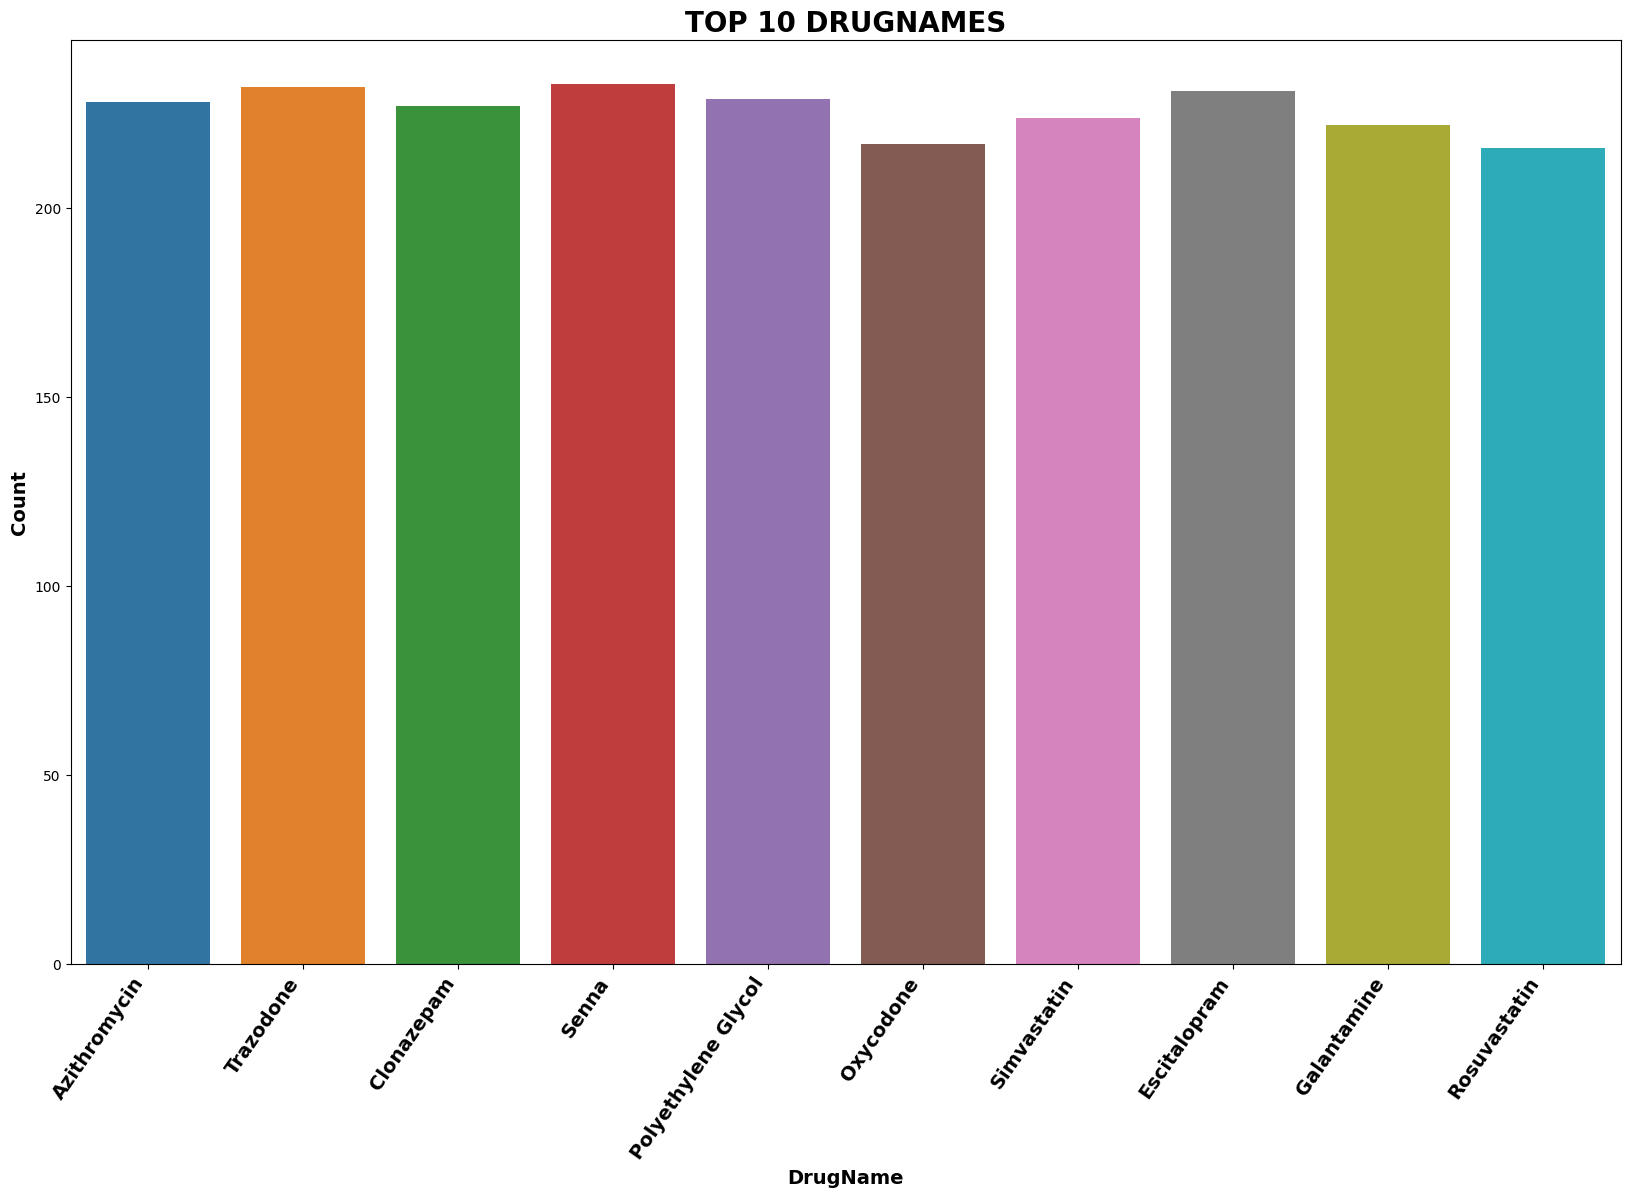

In [16]:
# Filtering data
Top_10_Products = PharmacySales_Dataframe['DrugName'].value_counts().nlargest(10).index
Filtered_df = PharmacySales_Dataframe[PharmacySales_Dataframe['DrugName'].isin(Top_10_Products)]

# Visualize result
sns.countplot(x='DrugName', data=Filtered_df)
plt.title("TOP 10 DRUGNAMES", fontsize=20, fontweight='bold')
plt.xlabel("DrugName", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=55, ha="right", fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(20,12)

# TOP 10 MOST OCCURING DRUGS

Text(0.5, 1.0, 'Top 10 Most Occurring DrugName')

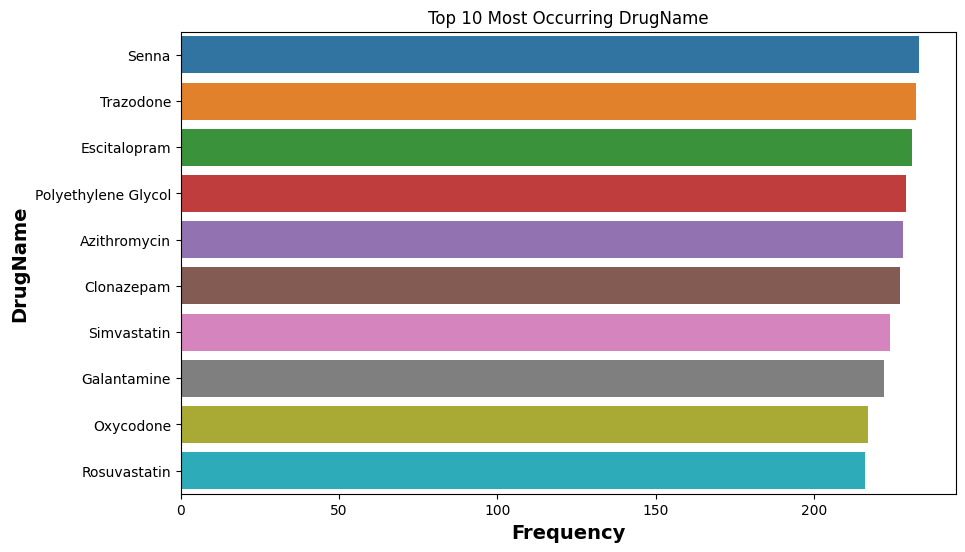

In [18]:
# Filter data
Top_Products = PharmacySales_Dataframe['DrugName'].value_counts().head(10)

# Visualize result
plt.figure(figsize=(10, 6))
sns.barplot(x=Top_Products.values, y=Top_Products.index)
plt.xlabel('Frequency', fontsize=14, fontweight='bold')
plt.ylabel('DrugName',fontsize=14, fontweight='bold')
plt.title('Top 10 Most Occurring DrugName')

# TOP DRUG NAMES AND PRICES

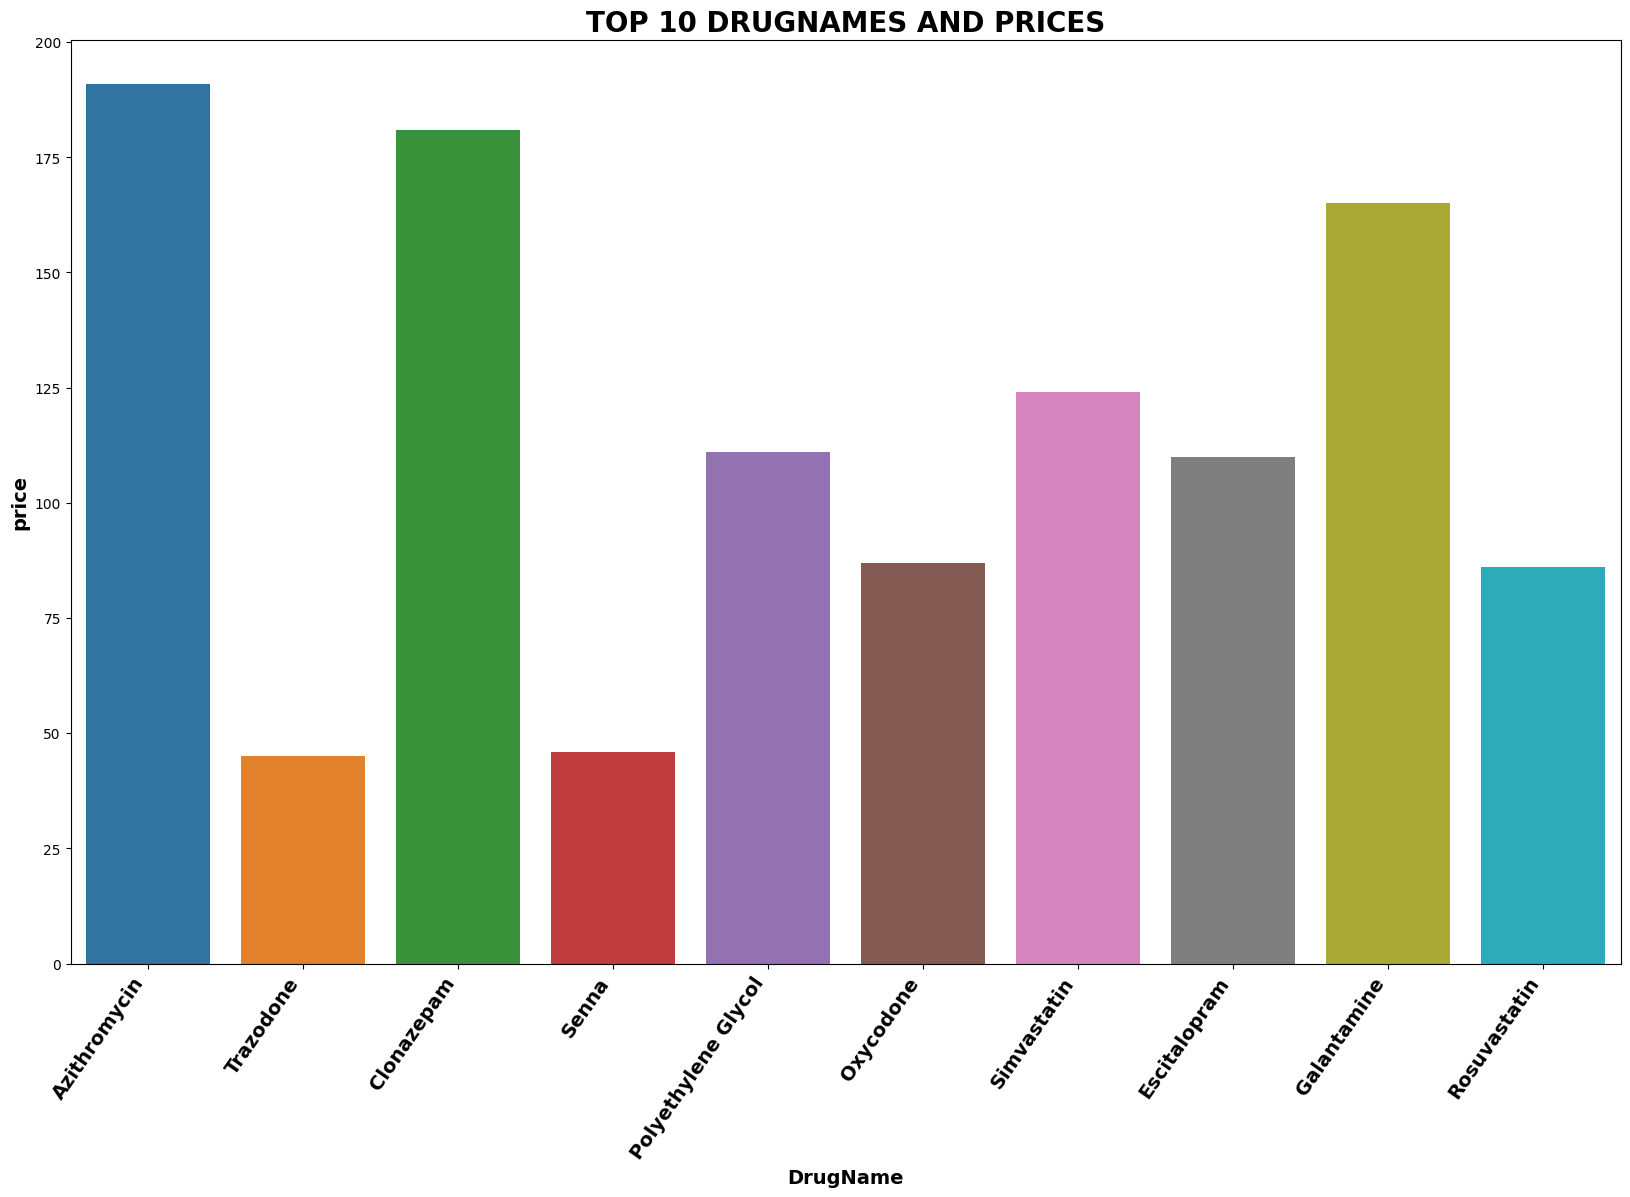

In [19]:
# Filtering data
Top_10_Products = PharmacySales_Dataframe['DrugName'].value_counts().nlargest(10).index
Filtered_df = PharmacySales_Dataframe[PharmacySales_Dataframe['DrugName'].isin(Top_10_Products)]

# Visualize result
sns.barplot(x='DrugName', y= 'y', data=Filtered_df)
plt.title("TOP 10 DRUGNAMES AND PRICES", fontsize=20, fontweight='bold')
plt.xlabel("DrugName", fontsize=14, fontweight='bold')
plt.ylabel("price", fontsize=14, fontweight='bold')
plt.xticks(rotation=55, ha="right", fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(20,12)

# COUNTPLOT OF DRUGCLASS WITH DRUGNAME

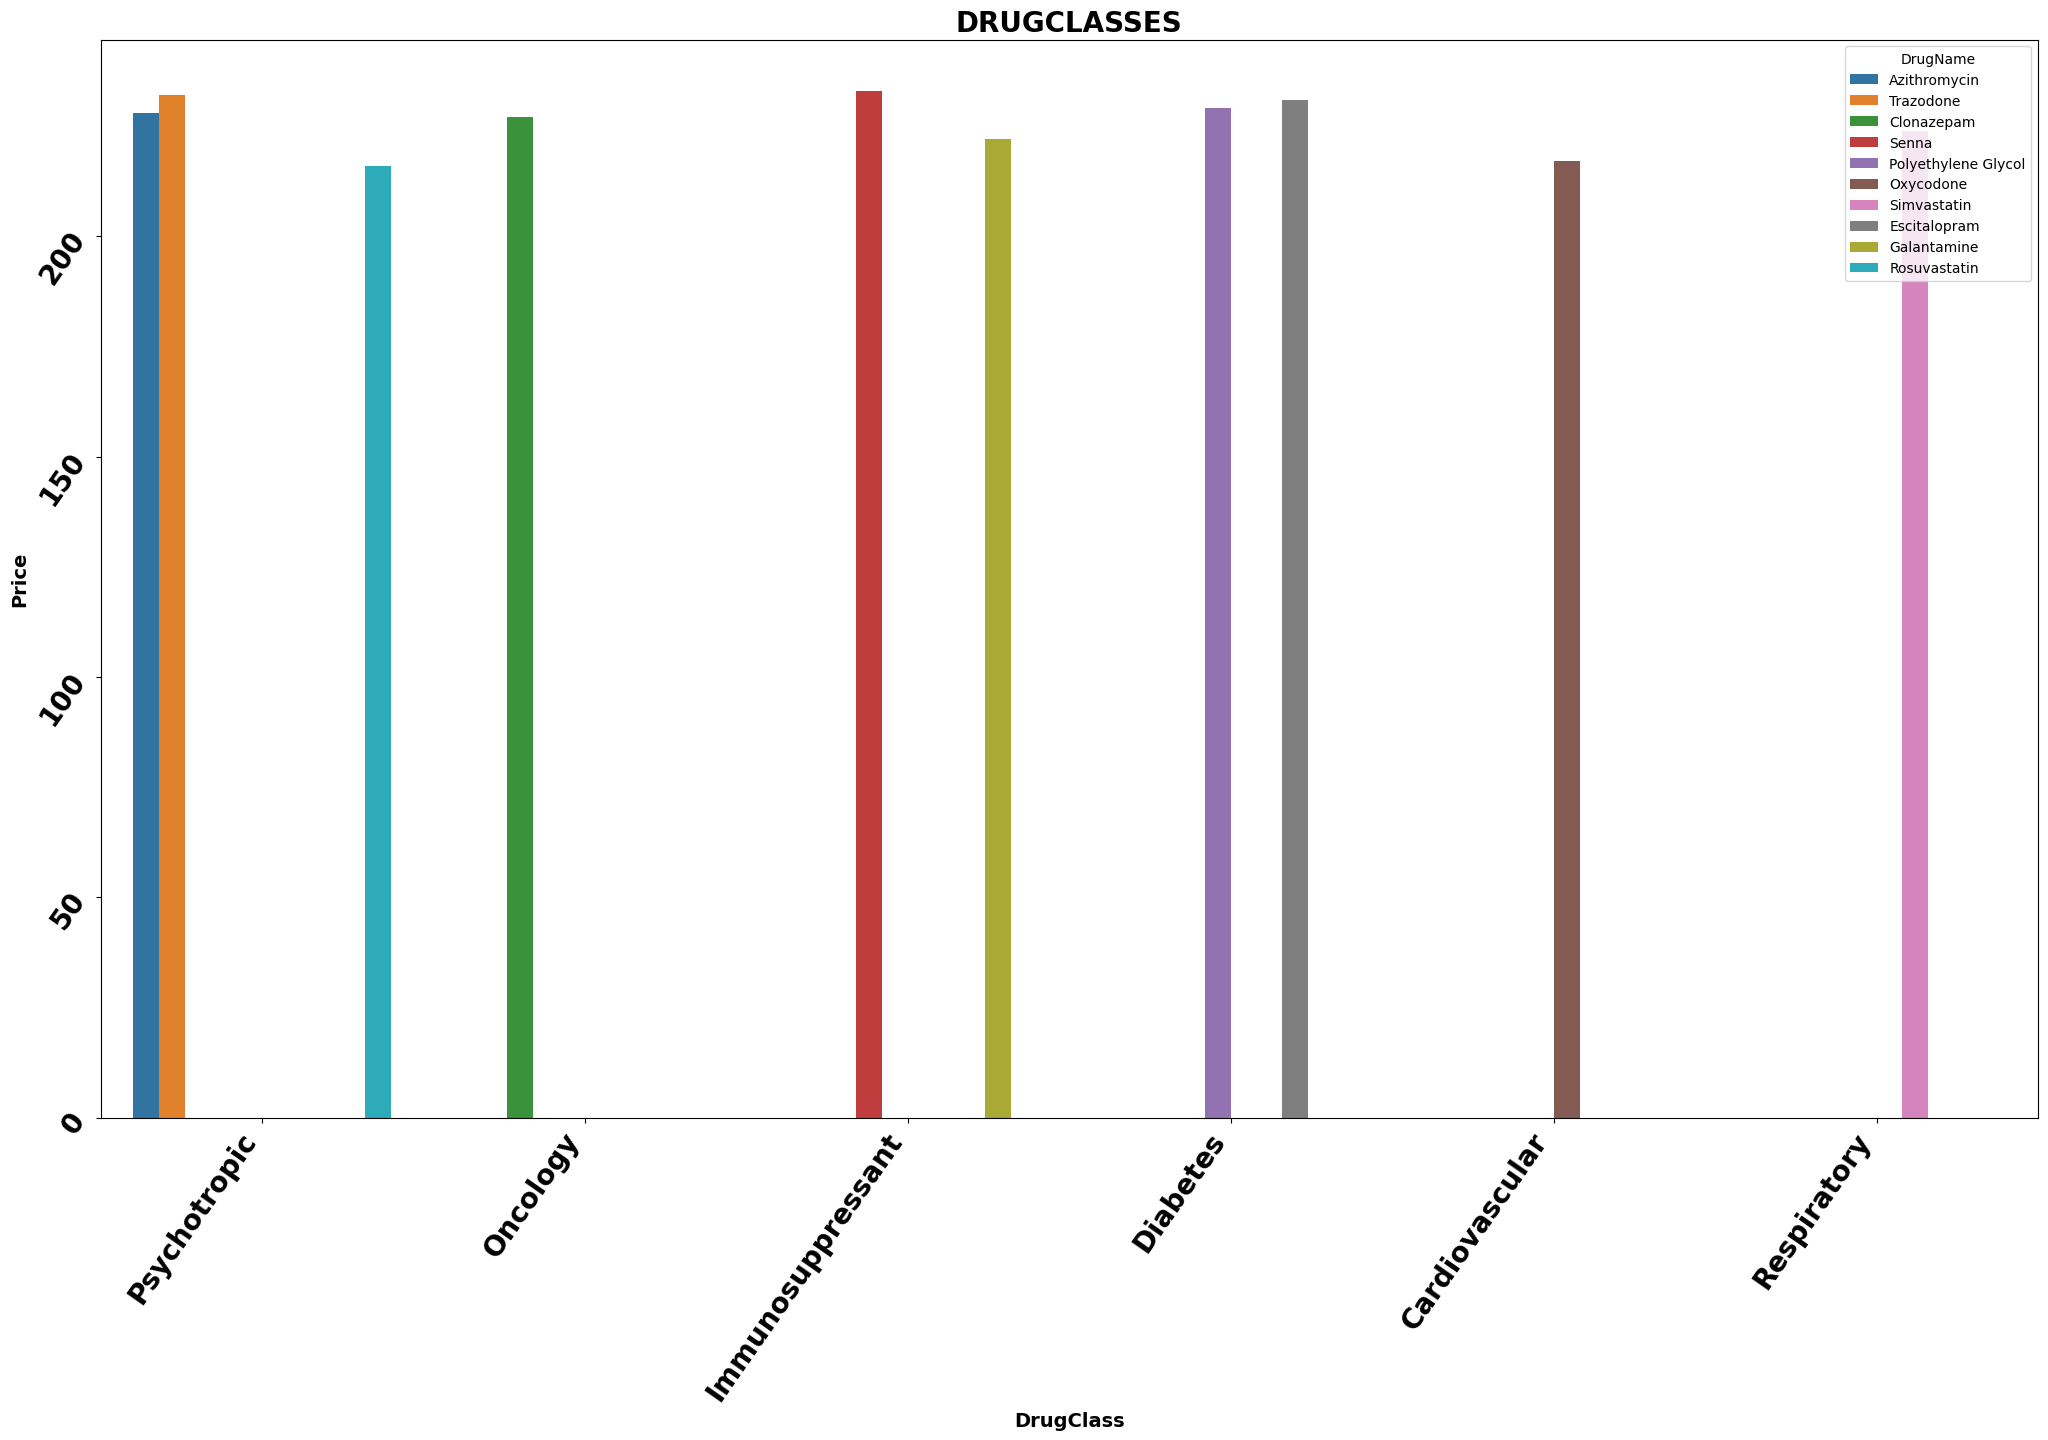

In [25]:
# Filtering data
Top_10_Products = PharmacySales_Dataframe['DrugName'].value_counts().nlargest(10).index
Filtered_df = PharmacySales_Dataframe[PharmacySales_Dataframe['DrugName'].isin(Top_10_Products)]

plt.figure(figsize=(10, 6))
sns.countplot(x='DrugClass', data=Filtered_df, hue='DrugName')
plt.title("DRUGCLASSES", fontsize=20, fontweight='bold')
plt.xlabel("DrugClass", fontsize=14, fontweight='bold')
plt.ylabel("Price", fontsize=14, fontweight='bold')
plt.xticks(rotation=55, ha="right", fontsize=20, fontweight='bold')
plt.yticks(rotation=55, ha="right", fontsize=20, fontweight='bold')
plt.gcf().set_size_inches(25,14)
plt.legend(title='DrugName', loc='upper right')

# MAIN TASKS 

                    # PRICE ANALYSIS 

# PRICE ANALYSIS
        # Make an analysis of Price trend to:
        # identify significant changes 
        # or fluctuations in pharmaceutical prices over time.

# IMPORTING DEPENDENCIES FOR PRICE FORECASTING

In [27]:
from prophet import Prophet 

# BUILDING THE MODEL FOR PRICE PREDICTION FORECASTING

In [28]:
m = Prophet(interval_width=0.95, daily_seasonality=True)

# FIT THE MODEL FOR PRICE PREDICTIONS FORECASTING

In [29]:
m.fit(PharmacySales_Dataframe)

16:28:53 - cmdstanpy - INFO - Chain [1] start processing
16:28:55 - cmdstanpy - INFO - Chain [1] done processing


# FORECASTING AWAY/ MAKING FUTURE PREDICTIONS

In [30]:
Future = m.make_future_dataframe(periods=360,freq='D')
Forecast = m.predict(Future)

# DISPALYING HEAD OF THE FORECASTING PREDICTIONS

In [32]:
Forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-01 09:04:00,115.781600,8.224478,220.302206,115.781600,115.781600,-5.842247,-5.842247,-5.842247,-5.842247,-5.842247,-5.842247,0.0,0.0,0.0,109.939353
1,2023-04-01 09:05:00,115.781688,9.465542,213.657992,115.781688,115.781688,-5.782883,-5.782883,-5.782883,-5.782883,-5.782883,-5.782883,0.0,0.0,0.0,109.998805
2,2023-04-01 09:06:00,115.781776,6.076046,214.878498,115.781776,115.781776,-5.723464,-5.723464,-5.723464,-5.723464,-5.723464,-5.723464,0.0,0.0,0.0,110.058312
3,2023-04-01 09:07:00,115.781864,9.889858,214.654718,115.781864,115.781864,-5.664009,-5.664009,-5.664009,-5.664009,-5.664009,-5.664009,0.0,0.0,0.0,110.117855
4,2023-04-01 09:08:00,115.781952,12.855527,205.690975,115.781952,115.781952,-5.604541,-5.604541,-5.604541,-5.604541,-5.604541,-5.604541,0.0,0.0,0.0,110.177411


# DISPALYING TAIL OF THE FORECASTING PREDICTIONS

In [33]:
Forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7069,2024-04-03 14:09:00,158.714321,59.408284,269.296518,154.482189,163.411291,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,0.0,0.0,0.0,156.270836
7070,2024-04-04 14:09:00,158.830784,51.746948,257.025606,154.579277,163.550274,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,0.0,0.0,0.0,156.387299
7071,2024-04-05 14:09:00,158.947247,55.002389,258.239363,154.676413,163.689795,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,0.0,0.0,0.0,156.503762
7072,2024-04-06 14:09:00,159.063710,52.025609,259.836446,154.773838,163.834428,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,0.0,0.0,0.0,156.620225
7073,2024-04-07 14:09:00,159.180173,50.671572,254.688613,154.871235,163.980787,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,-2.443485,0.0,0.0,0.0,156.736688


# PLOTING OR VISUALIZING FORECASTING PREDICTIONS ON PRICES

Text(83.34722222222221, 0.5, 'Prices')

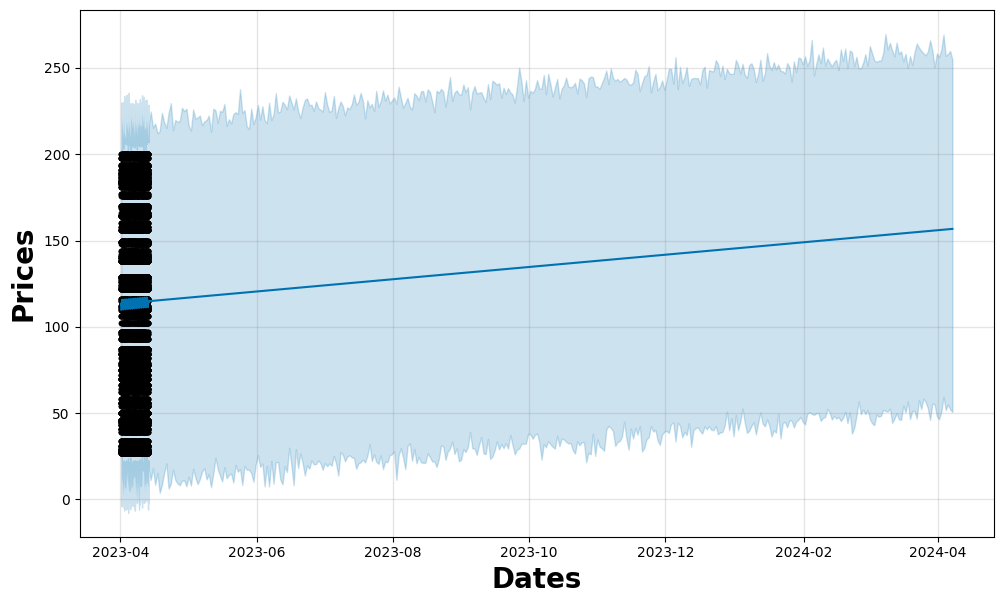

In [34]:
Main_Plot = m.plot(Forecast)
plt.xlabel("Dates",fontsize=20,fontweight='bold')
plt.ylabel("Prices",fontsize=20,fontweight='bold')

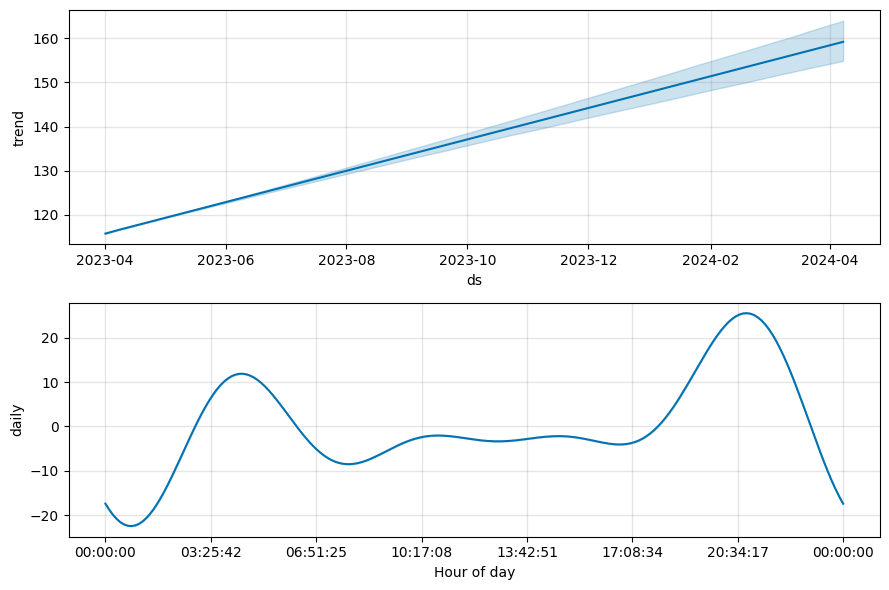

In [36]:
Components_Plot = m.plot_components(Forecast)